Question #2 (100 points):
Plot the training loss function for a neural network with four convolution layers on Iris and MNIST datasets.

Please enter the dataset you wish to visualize (iris, mnist): mnist
Dataset is being loaded...
Algorithm is being run...
Please wait...


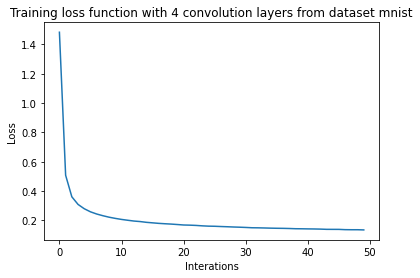

I'm done.


In [2]:
# Adapted from:
# https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/
# https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn import datasets, preprocessing
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def getDataIris():
    # Location of dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    # Assign colum names to the dataset
    names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    iris = pd.read_csv(url, names=names)

    # Assign data from first four columns to x variable
    x = iris.iloc[:, 0:4]

    # Assign data from fifth column to y variable
    y = iris.select_dtypes(include=[object])
    
    # Preprocessing
    le = preprocessing.LabelEncoder()
    y = y.apply(le.fit_transform)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    
    return x_train, x_test, y_train, y_test

def getDataMnist():
    # Load data from https://www.openml.org/d/554
    x, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
    x = x / 255.0
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    return x_train, x_test, y_train, y_test

if __name__ == "__main__":
    db, method, knn_weights = "", "", ""
    while db not in ("iris", "mnist"):
        db = input("Please enter the dataset you wish to visualize (iris, mnist): ").lower()
        if db not in ("iris", "mnist"):
            print("I'm sorry, I don't know this dataset...")
    print("Dataset is being loaded...")
    if db == "iris":
        x_train, x_test, y_train, y_test = getDataIris()
    else:
        x_train, x_test, y_train, y_test = getDataMnist()
        
    print("Algorithm is being run...")
    print("Please wait...")

    # Scaling
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    # Training
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=50)

    # This example won't converge, so we catch the warning and ignore it here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        if db == "iris":
            mlp.fit(x_train, y_train.values.ravel())
        else:
            mlp.fit(x_train, y_train.ravel())

        # Predictions
        predictions = mlp.predict(x_test)

        # Training loss function
        loss_values = mlp.loss_curve_
        
    plt.plot(loss_values)
    plt.title("Training loss function with 4 convolution layers from dataset %s" % db)
    plt.xlabel("Interations")
    plt.ylabel("Loss")
    plt.show()
        
    print("I'm done.")